In [586]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


churn = pd.read_csv('churn-bigml-20.csv')
churn

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


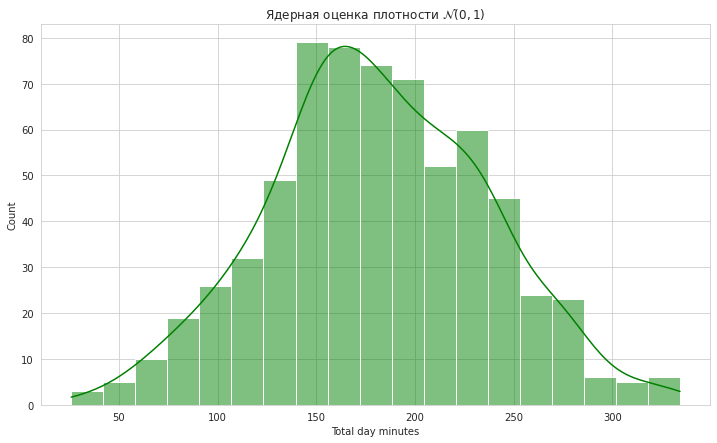

In [28]:
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
    
    plt.figure(figsize=(12, 7))
    plt.title(r"Ядерная оценка плотности $\mathcal{N}(0, 1)$")
    sns.histplot(churn['Total day minutes'],kde = True, color = 'green');

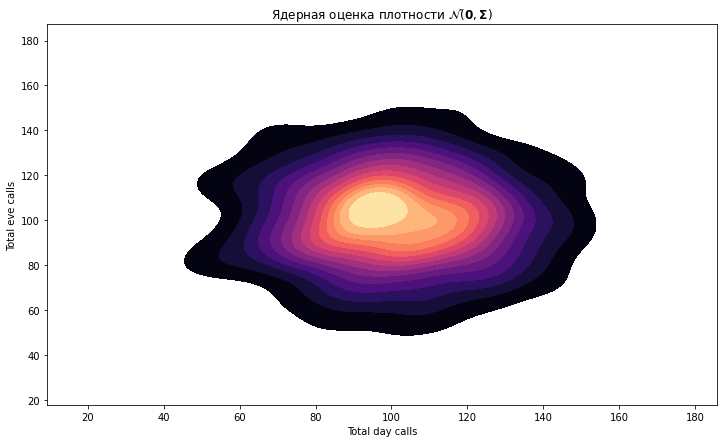

In [38]:
plt.figure(figsize=(12, 7))
plt.title(r"Ядерная оценка плотности $\mathcal{N}(\mathbf{0}, \mathbf{\Sigma})$")
sns.kdeplot(x = churn['Total day calls'], y = churn['Total eve calls'], n_levels=15, fill = True, cmap="magma");

In [ ]:
Задание 2

In [ ]:
Диаграмма с размахом

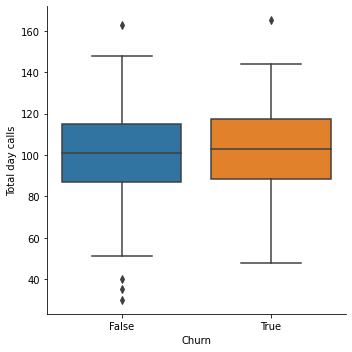

In [41]:
sns.catplot(kind = 'box', x = 'Churn', y = 'Total day calls', data = churn)

In [ ]:
Расширенный блок

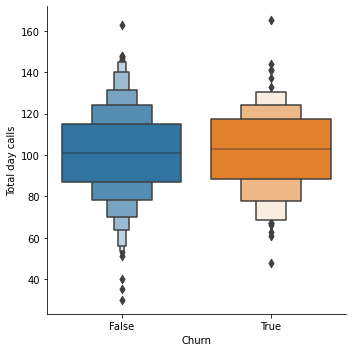

In [42]:
sns.catplot(kind = "boxen", x = "Churn", y = "Total day calls", data = churn)

In [ ]:
Диаграмма рассеивания

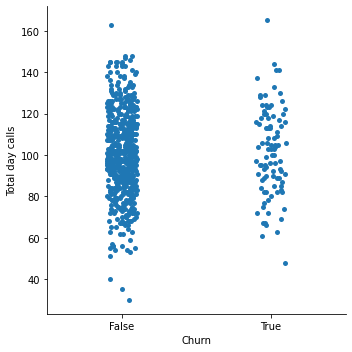

In [44]:
sns.catplot(x = "Churn", y = "Total day calls", data = churn)

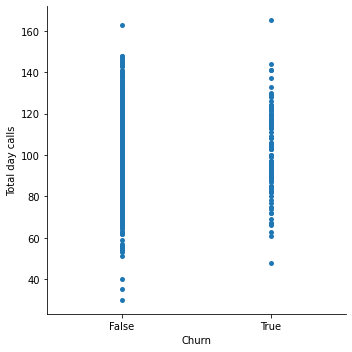

In [45]:
sns.catplot(x = "Churn", y = "Total day calls", jitter = False, data = churn)

In [ ]:
Диаграмма пчелиного роя

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


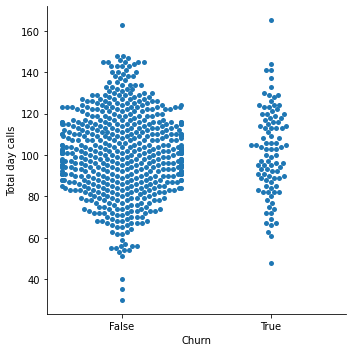

In [46]:
sns.catplot(kind = "swarm", x = "Churn", y = "Total day calls", data = churn)

In [ ]:
Критерий Граббса
Начнём с того, что проверим, могут ли данные быть нормально распределёнными

ShapiroResult(statistic=0.997448742389679, pvalue=0.3967135548591614)

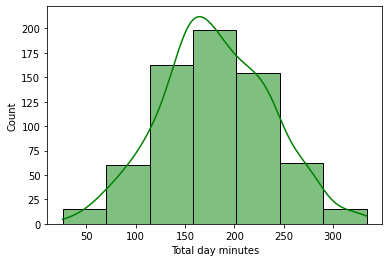

In [259]:
sns.histplot(churn['Total day minutes'],kde = True, color = 'green', bins = 7);
from scipy.stats import kstest
sps.shapiro(churn['Total day minutes'])

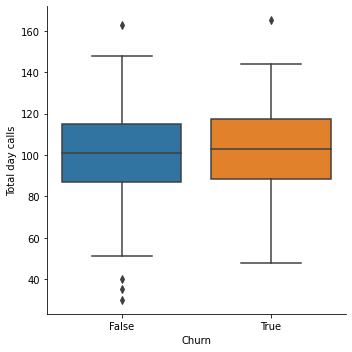

In [60]:
sns.catplot(kind = 'box', x = 'Churn', y = 'Total day calls', data = churn)

In [136]:
from outliers import smirnov_grubbs as grubbs

data = churn['Total day minutes']

#Возвращает сами выбросы
grubbs.min_test_outliers(data, alpha = 0.05)

[]

In [137]:
#Возвращает индексы выбросов
grubbs.max_test_indices(data, alpha = 0.05)

[]

In [138]:
#Возвращает данные без выбросов
grubbs.test(data, alpha = 0.05)

0      184.5
1      129.1
2      332.9
3      110.4
4      119.3
       ...  
662    137.1
663     83.6
664    193.9
665    169.8
666    213.8
Name: Total day minutes, Length: 667, dtype: float64

In [104]:
from neulab.OutlierDetection import DixonTest

churn['Total day minutes'].tail(7)

660    203.8
661    280.0
662    137.1
663     83.6
664    193.9
665    169.8
666    213.8
Name: Total day minutes, dtype: float64

In [110]:
d = {'col1': [203.8, 280, 137.1, 83.6, 193.9, 169.8, 213.8, 1000]}
df = pd.DataFrame(data=d)
qtest = DixonTest(dataframe=df, q=95, info=True, autorm=True)

Detected outlier: 
     col1
7  1000.0


In [145]:
data = churn.head(24).copy()

data.loc[(0, 11, 17, 23), 'Total day calls'] = np.nan
data.loc[(0, 10, 13, 19, 21), 'Total day minutes'] = np.nan
data.loc[(5, 6, 9, 23), 'Total day charge'] = np.nan

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   24 non-null     object 
 1   Account length          24 non-null     int64  
 2   Area code               24 non-null     int64  
 3   International plan      24 non-null     object 
 4   Voice mail plan         24 non-null     object 
 5   Number vmail messages   24 non-null     int64  
 6   Total day minutes       19 non-null     float64
 7   Total day calls         20 non-null     float64
 8   Total day charge        20 non-null     float64
 9   Total eve minutes       24 non-null     float64
 10  Total eve calls         24 non-null     int64  
 11  Total eve charge        24 non-null     float64
 12  Total night minutes     24 non-null     float64
 13  Total night calls       24 non-null     int64  
 14  Total night charge      24 non-null     floa

In [146]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,NaN,NaN,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137.0,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67.0,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103.0,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117.0,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,AK,36,408,No,Yes,30,146.3,128.0,NaN,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
6,MI,65,415,No,No,0,211.3,120.0,NaN,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
7,ID,119,415,No,No,0,159.1,114.0,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
8,VA,10,408,No,No,0,186.1,112.0,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False
9,WI,68,415,No,No,0,148.8,70.0,NaN,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False


In [156]:
#Заполним пропуски следующим значащим элементом из столбца
data.fillna(method = 'bfill')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,129.1,137.0,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137.0,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67.0,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103.0,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117.0,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,AK,36,408,No,Yes,30,146.3,128.0,27.05,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
6,MI,65,415,No,No,0,211.3,120.0,27.05,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
7,ID,119,415,No,No,0,159.1,114.0,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
8,VA,10,408,No,No,0,186.1,112.0,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False
9,WI,68,415,No,No,0,148.8,70.0,32.93,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False


In [142]:
churn.head(24)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
6,MI,65,415,No,No,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
7,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
8,VA,10,408,No,No,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False
9,WI,68,415,No,No,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False


In [ ]:
Сгенерируем выборку малого размера и проведём анализ для неё

In [344]:
import scipy.stats as sps
from scipy.stats import norm

x = sps.norm(loc = 1, scale = 3).rvs(size = 72)

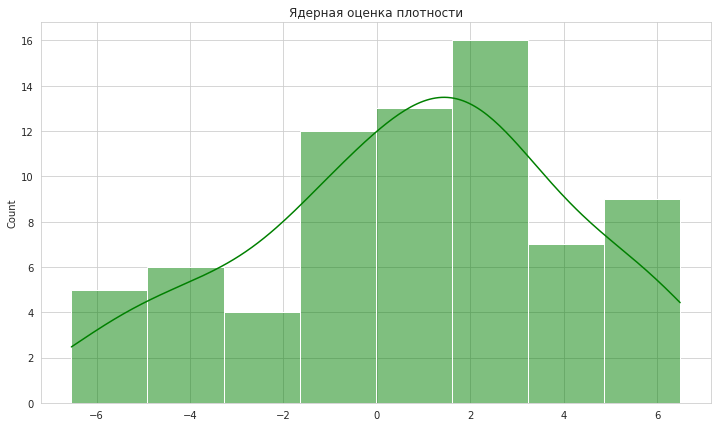

In [221]:
with sns.plotting_context(font_scale = 1.5), sns.axes_style('whitegrid'):
    
    plt.figure(figsize = (12, 7))
    plt.title(r"Ядерная оценка плотности")
    sns.histplot(x, kde = True, color = 'green');

<AxesSubplot:title={'center':'Эмпирическая функция распределения X'}, ylabel='Density'>

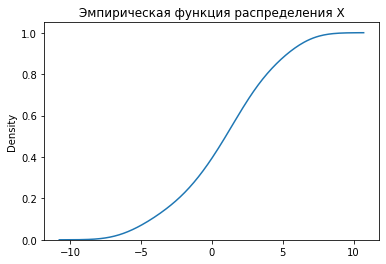

In [222]:
plt.title(r"Эмпирическая функция распределения X")
sns.kdeplot(x, cumulative = True)

(array([ 1.,  1.,  1.,  2.,  3.,  4.,  4.,  5.,  5.,  5.,  5.,  6.,  6.,
         7.,  9.,  9., 10., 11., 12., 12., 12., 12., 13., 14., 14., 15.,
        15., 15., 19., 19., 22., 24., 24., 24., 25., 27., 29., 29., 30.,
        32., 33., 36., 37., 39., 40., 44., 45., 47., 48., 51., 52., 54.,
        54., 56., 56., 57., 59., 60., 61., 62., 62., 63., 63., 64., 64.,
        65., 66., 67., 68., 69., 69., 72.]),
 array([-6.53890444, -6.35787428, -6.17684413, -5.99581398, -5.81478382,
        -5.63375367, -5.45272352, -5.27169336, -5.09066321, -4.90963306,
        -4.7286029 , -4.54757275, -4.36654259, -4.18551244, -4.00448229,
        -3.82345213, -3.64242198, -3.46139183, -3.28036167, -3.09933152,
        -2.91830137, -2.73727121, -2.55624106, -2.3752109 , -2.19418075,
        -2.0131506 , -1.83212044, -1.65109029, -1.47006014, -1.28902998,
        -1.10799983, -0.92696967, -0.74593952, -0.56490937, -0.38387921,
        -0.20284906, -0.02181891,  0.15921125,  0.3402414 ,  0.52127155,
      

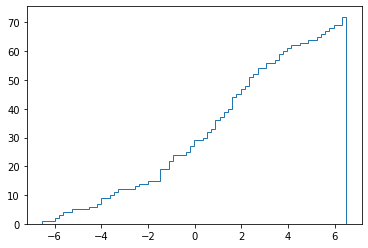

In [223]:
plt.hist(x, histtype = 'step', cumulative = True, bins = len(x))

<AxesSubplot:title={'center':'Эмпирическая функция плотности распределения X'}, ylabel='Density'>

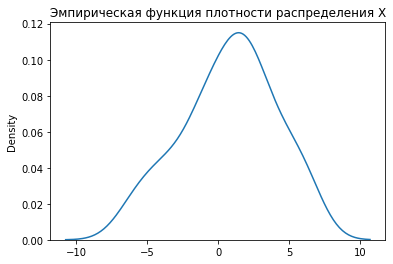

In [224]:
plt.title(r"Эмпирическая функция плотности распределения X")
sns.kdeplot(x, cumulative = False)

In [181]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

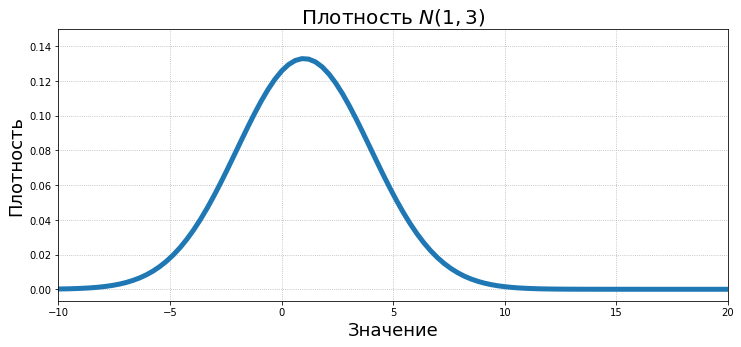

In [225]:
show_pdf(
    pdf=sps.norm.pdf, grid_size=100, loc=1, scale=3, xmin = -10, xmax = 20, ymax = 0.15
)

In [186]:
import pylab 

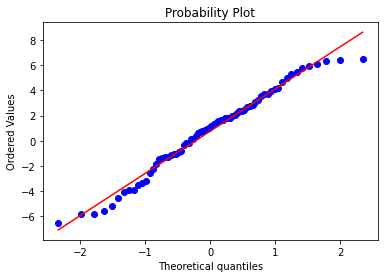

In [226]:
sps.probplot(x, dist = "norm", plot = pylab)
pylab.show()

In [345]:
#Критерий Колмогорова-Смирнова
sps.kstest(x, 'norm', args = (1, 3))

KstestResult(statistic=0.05614903777704927, pvalue=0.9674878578154633)

In [251]:
#Критерий Шапиро-Уилка
sps.shapiro(x)

ShapiroResult(statistic=0.9997453093528748, pvalue=0.9550113081932068)

In [234]:
#Критерий Андерсона-Дарлинга
sps.anderson(x, dist = 'norm')

AndersonResult(statistic=0.15150848489065538, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [346]:
#Критерий Крамера фон Мизеса
sps.cramervonmises(x, 'norm', args = (1, 3))

CramerVonMisesResult(statistic=0.03450519027198679, pvalue=0.9601167132862036)

In [246]:
#Критерий Колмогорова-Смирнова в редакции Лиллиефорса
import statsmodels

statsmodels.stats.diagnostic.lilliefors(x, dist='norm', pvalmethod='table')

(0.007460683815836533, 0.9041066999685753)

In [ ]:
#Критерий Шапиро-Франсия


In [347]:
x = sps.norm(loc=2.7, scale=10).rvs(size=3650)

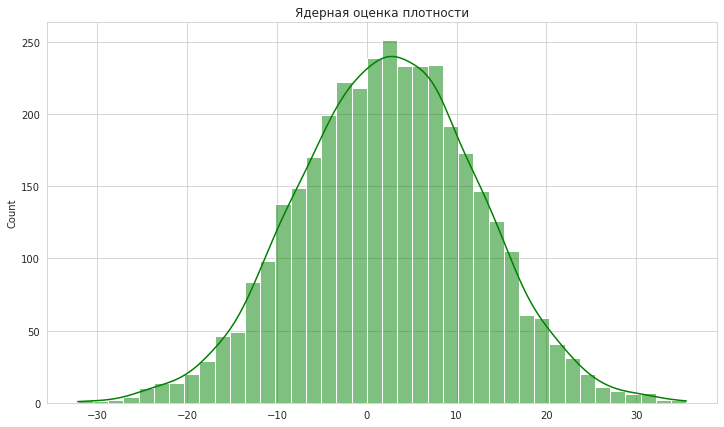

In [228]:
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
    
    plt.figure(figsize=(12, 7))
    plt.title(r"Ядерная оценка плотности")
    sns.histplot(x, kde = True, color = 'green');

<AxesSubplot:title={'center':'Эмпирическая функция распределения X'}, ylabel='Density'>

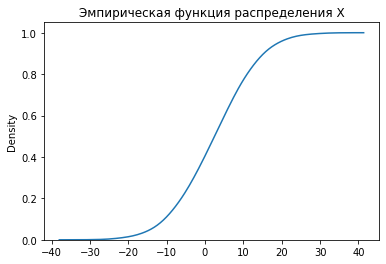

In [229]:
plt.title(r"Эмпирическая функция распределения X")
sns.kdeplot(x, cumulative = True)

(array([1.000e+00, 1.000e+00, 1.000e+00, ..., 3.649e+03, 3.649e+03,
        3.650e+03]),
 array([-32.18487583, -32.16631272, -32.14774961, ...,  35.53334161,
         35.55190472,  35.57046783]),
 [<matplotlib.patches.Polygon at 0x7fe47e90d4c0>])

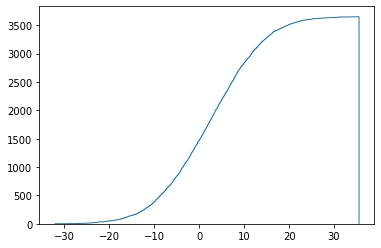

In [230]:
plt.hist(x, histtype = 'step', cumulative = True, bins = len(x))

<AxesSubplot:title={'center':'Эмпирическая функция плотности распределения X'}, ylabel='Density'>

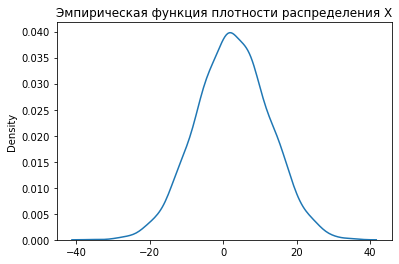

In [215]:
plt.title(r"Эмпирическая функция плотности распределения X")
sns.kdeplot(x, cumulative = False)

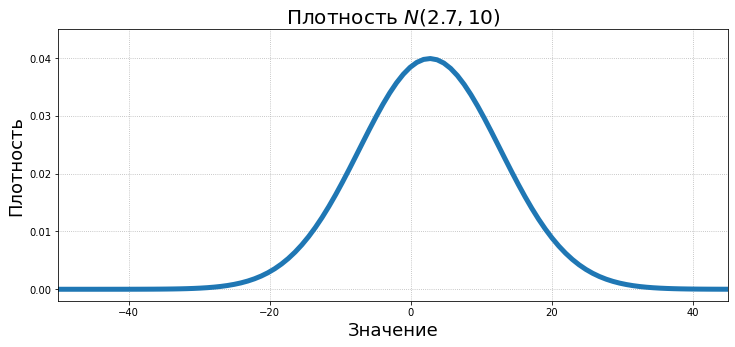

In [231]:
show_pdf(
    pdf=sps.norm.pdf, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=2.7, scale=10, xmin = -50, xmax = 45, ymax = 0.045
)

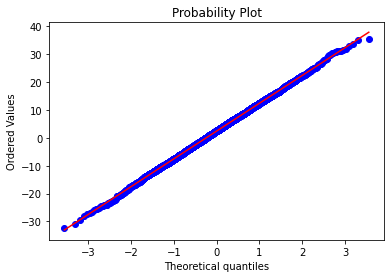

In [232]:
sps.probplot(x, dist = "norm", plot = pylab)
pylab.show()

In [349]:
#Критерий Колмогорова-Смирнова
sps.kstest(x, 'norm', args = (2.7, 10))

KstestResult(statistic=0.009876286761817399, pvalue=0.8650657888155042)

In [262]:
#Критерий Шапиро-Уилка
sps.shapiro(x)

ShapiroResult(statistic=0.999575674533844, pvalue=0.6440131068229675)

In [263]:
#Критерий Андерсона-Дарлинга
sps.anderson(x, dist = 'norm')

AndersonResult(statistic=0.3617247054053223, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [348]:
#Критерий Крамера фон Мизеса
sps.cramervonmises(x, 'norm', args = (2.7, 10))

CramerVonMisesResult(statistic=0.04236490565360669, pvalue=0.920616464992861)

In [265]:
#Критерий Колмогорова-Смирнова в редакции Лиллиефорса
statsmodels.stats.diagnostic.lilliefors(x, dist='norm', pvalmethod='table')

(0.010509214287284019, 0.43908440221914175)

In [ ]:
#Критерий Шапиро-Франсия



In [350]:
x = churn['Total day charge'].head(96).copy()

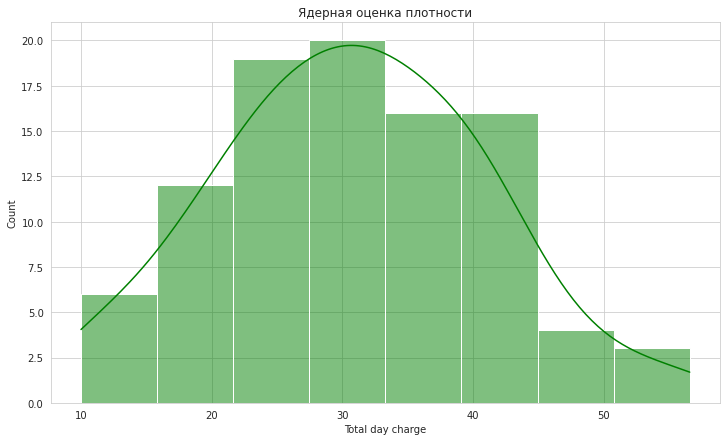

In [298]:
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
    
    plt.figure(figsize=(12, 7))
    plt.title(r"Ядерная оценка плотности")
    sns.histplot(x, kde = True, color = 'green');

<AxesSubplot:title={'center':'Эмпирическая функция распределения X'}, xlabel='Total day charge', ylabel='Density'>

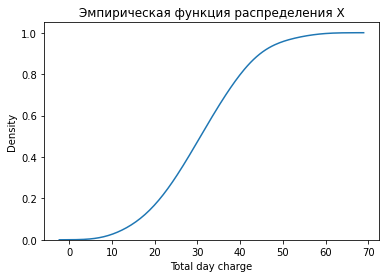

In [299]:
plt.title(r"Эмпирическая функция распределения X")
sns.kdeplot(x, cumulative = True)

(array([ 2.,  3.,  3.,  4.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  7.,
         9.,  9., 10., 12., 12., 13., 13., 14., 17., 18., 18., 20., 20.,
        22., 24., 24., 24., 27., 32., 33., 35., 35., 37., 37., 39., 40.,
        43., 44., 45., 48., 51., 53., 55., 56., 57., 59., 60., 63., 63.,
        64., 66., 70., 70., 71., 72., 72., 73., 75., 79., 80., 83., 84.,
        85., 85., 86., 86., 86., 87., 89., 90., 90., 91., 91., 91., 92.,
        92., 92., 92., 92., 92., 93., 93., 94., 94., 94., 94., 94., 94.,
        94., 94., 95., 95., 96.]),
 array([10.01      , 10.49520833, 10.98041667, 11.465625  , 11.95083333,
        12.43604167, 12.92125   , 13.40645833, 13.89166667, 14.376875  ,
        14.86208333, 15.34729167, 15.8325    , 16.31770833, 16.80291667,
        17.288125  , 17.77333333, 18.25854167, 18.74375   , 19.22895833,
        19.71416667, 20.199375  , 20.68458333, 21.16979167, 21.655     ,
        22.14020833, 22.62541667, 23.110625  , 23.59583333, 24.08104167,
        24.56625

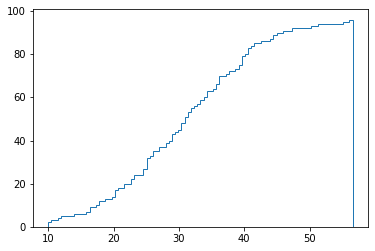

In [300]:
plt.hist(x, histtype = 'step', cumulative = True, bins = len(x))

<AxesSubplot:title={'center':'Эмпирическая функция плотности распределения X'}, xlabel='Total day charge', ylabel='Density'>

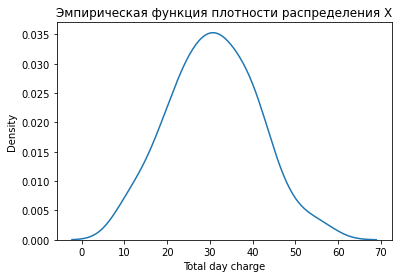

In [301]:
plt.title(r"Эмпирическая функция плотности распределения X")
sns.kdeplot(x, cumulative = False)

In [352]:
import distfit
from distfit import distfit

dist = distfit()
print(dist.fit_transform(x))

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00999007] [loc=30.801 scale=10.170]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0220891] [loc=10.010 scale=20.791]
[distfit] >[pareto    ] [0.05 sec] [RSS: 0.03671] [loc=-0.021 scale=10.031]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 0.0105093] [loc=29.932 scale=8.933]
[distfit] >[t         ] [0.09 sec] [RSS: 0.00999011] [loc=30.801 scale=10.170]
[distfit] >[genextreme] [0.13 sec] [RSS: 0.0100348] [loc=27.038 scale=9.957]
[distfit] >[gamma     ] [0.09 sec] [RSS: 0.0100328] [loc=-121.196 scale=0.681]
[distfit] >[lognorm   ] [0.18 sec] [RSS: 0.010033] [loc=-199.596 scale=230.172]
[distfit] >[beta      ] [0.04 sec] [RSS: 0.0101093] [loc=2.574 scale=64.806]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0162133] [loc=10.010 scale=46.580]
[distfit] >[loggamma  ] [0.08 sec] [RSS: 0.00997439] [loc=-2549.290 scale=361.889]
[distfit] >Compute confidence interval [parametric]
{'model': {'distr': <scipy.stats._continuous_

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nloggamma\nRSS(c=276.085, loc=-1780.2, scale=334.624)'}, xlabel='Values', ylabel='Frequency'>)

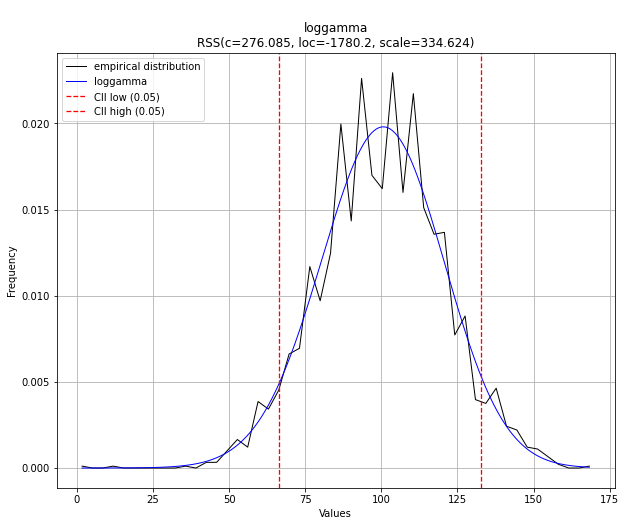

In [328]:
dist.plot()  

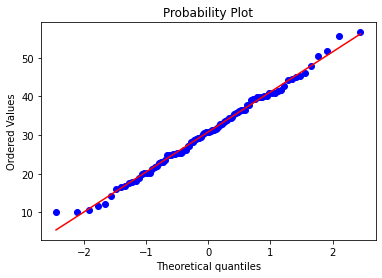

In [353]:
sps.probplot(x, dist = "norm", plot = pylab)
pylab.show()

In [332]:
#Критерий Колмогорова-Смирнова, значения из dist.fit_transform(x)
sps.kstest(x, 'norm', args = (30.800625, 10.170119))

KstestResult(statistic=0.04276561910269172, pvalue=0.9916307582097323)

In [309]:
#Критерий Шапиро-Уилка
sps.shapiro(x)

ShapiroResult(statistic=0.9913378357887268, pvalue=0.7931119203567505)

In [310]:
#Критерий Андерсона-Дарлинга
sps.anderson(x, dist = 'norm')

AndersonResult(statistic=0.13582444927007487, critical_values=array([0.554, 0.631, 0.757, 0.884, 1.051]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [351]:
#Критерий Крамера фон Мизеса
sps.cramervonmises(x, 'norm', args = (30.800625, 10.170119))

CramerVonMisesResult(statistic=0.01768725807717667, pvalue=0.9987563994143196)

In [312]:
#Критерий Колмогорова-Смирнова в редакции Лиллиефорса
statsmodels.stats.diagnostic.lilliefors(x, dist='norm', pvalmethod='table')

(0.0415449178068078, 0.9588126193898292)

In [ ]:
#Критерий Шапиро-Франсия

In [587]:
churn_big = pd.read_csv('churn-bigml-80.csv')
churn_big
x = churn_big['Total eve calls'].copy()

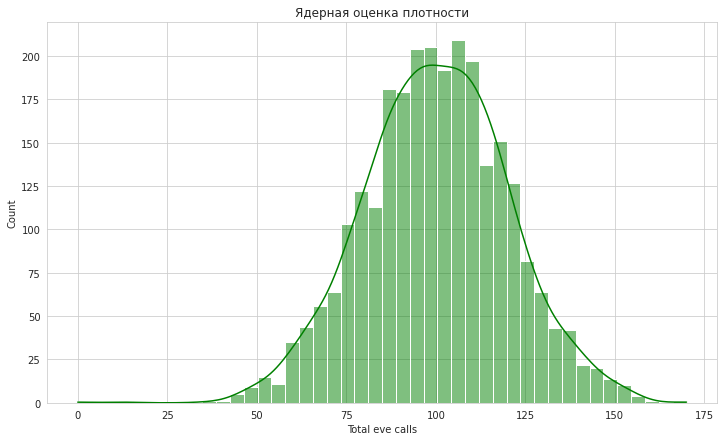

In [314]:
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
    
    plt.figure(figsize=(12, 7))
    plt.title(r"Ядерная оценка плотности")
    sns.histplot(x, kde = True, color = 'green');

<AxesSubplot:title={'center':'Эмпирическая функция распределения X'}, xlabel='Total eve calls', ylabel='Density'>

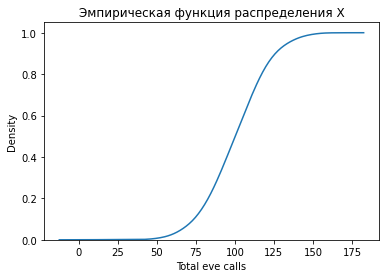

In [355]:
plt.title(r"Эмпирическая функция распределения X")
sns.kdeplot(x, cumulative = True)

(array([1.000e+00, 1.000e+00, 1.000e+00, ..., 2.665e+03, 2.665e+03,
        2.666e+03]),
 array([0.00000000e+00, 6.37659415e-02, 1.27531883e-01, ...,
        1.69872468e+02, 1.69936234e+02, 1.70000000e+02]),
 [<matplotlib.patches.Polygon at 0x7fe46026c7f0>])

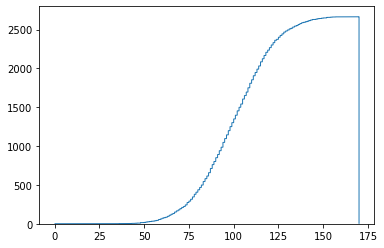

In [316]:
plt.hist(x, histtype = 'step', cumulative = True, bins = len(x))

<AxesSubplot:title={'center':'Эмпирическая функция плотности распределения X'}, xlabel='Total eve calls', ylabel='Density'>

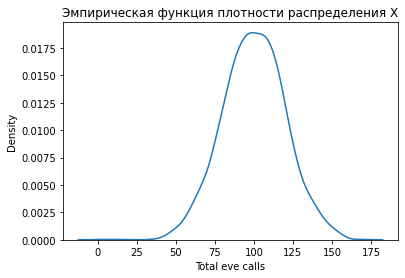

In [356]:
plt.title(r"Эмпирическая функция плотности распределения X")
sns.kdeplot(x, cumulative = False)

In [357]:
dist = distfit()
print(dist.fit_transform(x))

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.000130225] [loc=100.024 scale=20.158]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.00347014] [loc=0.000 scale=100.024]
[distfit] >[pareto    ] [0.24 sec] [RSS: 0.00341192] [loc=-2037086.379 scale=2037086.378]
[distfit] >[dweibull  ] [0.06 sec] [RSS: 0.000163347] [loc=100.480 scale=17.334]
[distfit] >[t         ] [0.12 sec] [RSS: 0.000130018] [loc=100.083 scale=19.961]
[distfit] >[genextreme] [0.51 sec] [RSS: 0.000148107] [loc=92.606 scale=20.319]
[distfit] >[gamma     ] [0.31 sec] [RSS: 0.000132102] [loc=-692.833 scale=0.513]
[distfit] >[lognorm   ] [0.55 sec] [RSS: 0.000131507] [loc=-1991.092 scale=2090.952]
[distfit] >[beta      ] [0.30 sec] [RSS: 0.000129532] [loc=-3444044.878 scale=3444621.099]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.00252578] [loc=0.000 scale=170.000]
[distfit] >[loggamma  ] [0.12 sec] [RSS: 0.000129342] [loc=-1780.197 scale=334.624]
[distfit] >Compute confidence interval [parametr

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nloggamma\nRSS(c=276.085, loc=-1780.2, scale=334.624)'}, xlabel='Values', ylabel='Frequency'>)

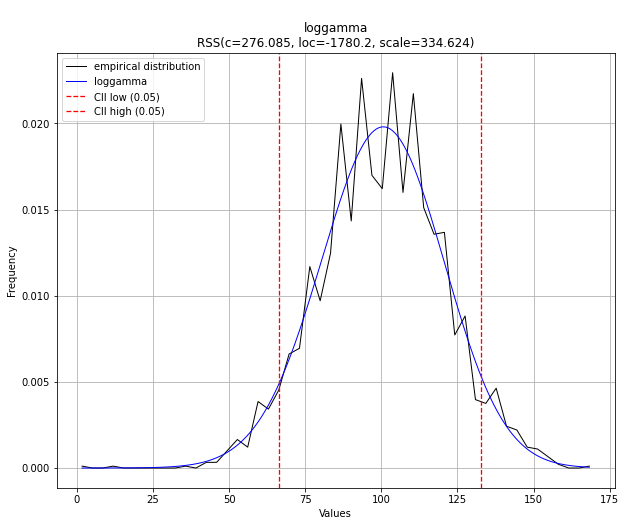

In [358]:
dist.plot() 

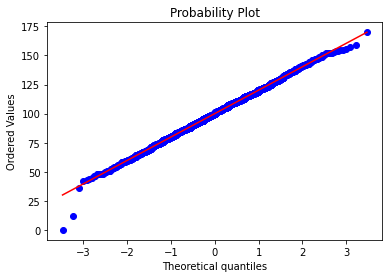

In [359]:
sps.probplot(x, dist = "norm", plot = pylab)
pylab.show()

In [360]:
#Критерий Колмогорова-Смирнова, значения из dist.fit_transform(x)
sps.kstest(x, 'norm', args = (100.023631, 20.157664))

KstestResult(statistic=0.01910187660400564, pvalue=0.2814103395831338)

In [338]:
#Критерий Шапиро-Уилка
sps.shapiro(x)

ShapiroResult(statistic=0.9983380436897278, pvalue=0.007877049967646599)

In [339]:
#Критерий Андерсона-Дарлинга
sps.anderson(x, dist = 'norm')

AndersonResult(statistic=0.5330805700450583, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [361]:
#Критерий Крамера фон Мизеса
sps.cramervonmises(x, 'norm', args = (100.023631, 20.157664))

CramerVonMisesResult(statistic=0.08910427011066606, pvalue=0.6409930818095353)

In [343]:
#Критерий Колмогорова-Смирнова в редакции Лиллиефорса
statsmodels.stats.diagnostic.lilliefors(x, dist='norm', pvalmethod='table')

(0.019083962049523673, 0.02208619934114469)

In [ ]:
#Критерий Шапиро-Франсия


In [364]:
#Создадим наборы данных для критериев Стьюдента, Фишера, Левене, Бартлетта
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

seed(1)

data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51

print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=50.303 stdv=4.426
data2: mean=51.764 stdv=4.660


In [367]:
#Создадим наборы данных для критериев Уилкоксона-Манна-Уитни и Флингера-Килина
from numpy.random import standard_t

seed(1)

data3 = 3 * standard_t(2, 100) + 3
data4 = 3 * standard_t(2, 100) + 4

print('data1: mean=%.3f stdv=%.3f' % (mean(data3), std(data3)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data4), std(data4)))

data1: mean=7.865 stdv=46.005
data2: mean=3.925 stdv=6.410


In [369]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=-2.262, p=0.025


In [373]:
from statsmodels.stats.power import TTestIndPower

#Определение объёма выборки для заданной мощности
effect = 0.8
alpha = 0.05
power = 0.8


analysis = TTestIndPower()
result = analysis.solve_power(effect, power = power, nobs1 = None, ratio = 1.0, alpha = alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


In [374]:
#Определение мощности при заданном обёеме выборки
effect = 0.8
alpha = 0.05
power = 0.8


analysis = TTestIndPower()
result = analysis.solve_power(effect, nobs1 = 100, ratio = 1.0, alpha = alpha)
print('Power: %.3f' % result)

Power: 1.000


In [383]:
from scipy.stats import mannwhitneyu

#двусторонний
mannwhitneyu(data3, data4, use_continuity = True, alternative = 'two-sided')

MannwhitneyuResult(statistic=4263.0, pvalue=0.07193078736067997)

In [381]:
#одно из значений меньше
mannwhitneyu(data3, data4, use_continuity = True, alternative = 'less')

MannwhitneyuResult(statistic=4263.0, pvalue=0.035965393680339984)

In [392]:
from numpy import var
from scipy.stats import f

F = var(data1) / var(data2) 
df1 = len(data1) - 1
df2 = len(data2) - 1
alpha = 0.05 
p_value = f.cdf(F, df1, df2) 
p_value

0.30445165410647973

In [384]:
from scipy.stats import levene

levene(data1, data2)

LeveneResult(statistic=0.04311660040667212, pvalue=0.8357192887848182)

In [385]:
from scipy.stats import bartlett

bartlett(data1, data2)

BartlettResult(statistic=0.2617780282656982, pvalue=0.6089012486834637)

In [388]:
from scipy.stats import fligner

fligner(data3, data4)

FlignerResult(statistic=0.02747767752761581, pvalue=0.8683427400679339)

In [266]:
sps.shapiro(churn['Total day minutes'])

ShapiroResult(statistic=0.997448742389679, pvalue=0.3967135548591614)

In [267]:
sps.shapiro(churn['Total day charge'])

ShapiroResult(statistic=0.9974494576454163, pvalue=0.3969789445400238)

In [268]:
sps.shapiro(churn['Total night minutes'])

ShapiroResult(statistic=0.9985708594322205, pvalue=0.8747250437736511)

In [ ]:
import matplotlib.pyplot as plt

In [269]:
#Корреляция между day minutes и day charge
my_rho = np.corrcoef(churn['Total day minutes'], churn['Total day charge'])

print(my_rho)

[[1.         0.99999995]
 [0.99999995 1.        ]]


In [270]:
#Корреляция между day minutes и night minutes
my_rho = np.corrcoef(churn['Total day minutes'], churn['Total night minutes'])

print(my_rho)

[[ 1.         -0.03160031]
 [-0.03160031  1.        ]]


In [ ]:
Коэффициент корреляции Спирмана

In [274]:
#Корреляция между day minutes и day charge
rho, p = sps.spearmanr(churn['Total day minutes'], churn['Total day charge'])
print(rho, p)

1.0 0.0


In [276]:
#Корреляция между day minutes и night minutes
rho, p = sps.spearmanr(churn['Total day minutes'], churn['Total night minutes'])
print(rho, p)

-0.040876860567850754 0.2918095347979592


In [278]:
#Корреляция между day minutes и day charge
sps.kendalltau(churn['Total day minutes'], churn['Total day charge'])

KendalltauResult(correlation=1.0, pvalue=0.0)

In [279]:
#Корреляция между day minutes и night minutes
sps.kendalltau(churn['Total day minutes'], churn['Total night minutes'])

KendalltauResult(correlation=-0.028794024978374473, pvalue=0.26616052210040675)

In [418]:
from scipy.stats import chi2_contingency 

info = [[12, 40], [6, 42]] 
stats, p, dof, x= chi2_contingency(info, correction = True) 

significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
	print('Reject NULL HYPOTHESIS') 
else: 
	print('ACCEPT NULL HYPOTHESIS')

p value: 0.26487964660563307
ACCEPT NULL HYPOTHESIS


In [ ]:
Точный тест Фишера

In [417]:
from scipy.stats import fisher_exact

info = [[8, 7], [7, 8]]
oddsr, p = fisher_exact(info, alternative='two-sided')
p

1.0

In [422]:
from statsmodels.stats.contingency_tables import mcnemar

info = [[8, 7], [7, 8]]
print(mcnemar(info, exact = False, correction = False))

pvalue      1.0
statistic   0.0


In [426]:
import cmh
from cmh import CMH

df = pd.DataFrame(
    [
        ['greater', 'day', 'yes'],
        ['greater', 'day', 'yes'],
        ['greater', 'day', 'no'],
        ['greater', 'eve', 'no'],
        ['greater', 'eve', 'yes'],
        ['greater', 'eve', 'yes'],
        ['greater', 'eve', 'yes'],
        ['greater', 'eve', 'yes'],
        ['greater', 'eve', 'yes'],
        ['greater', 'eve', 'yes'],
        ['greater', 'eve', 'no'],
        ['greater', 'eve', 'no'],
        ['greater', 'eve', 'no'],
        ['greater', 'eve', 'no'],
        ['greater', 'eve', 'no'],

        ['lesser', 'day', 'yes'],
        ['lesser', 'day', 'yes'],
        ['lesser', 'day', 'yes'],
        ['lesser', 'day', 'no'],
        ['lesser', 'eve', 'yes'],
        ['lesser', 'eve', 'yes'],
        ['lesser', 'eve', 'yes'],
        ['lesser', 'eve', 'yes'],
        ['lesser', 'eve', 'no'],
        ['lesser', 'eve', 'no'],
        ['lesser', 'eve', 'no'],
        ['lesser', 'eve', 'no'],
        ['lesser', 'eve', 'no'],
        ['lesser', 'eve', 'no'],
        ['lesser', 'eve', 'no'],

    ],
    columns=['avg', 'time', 'subscription']
)

result = CMH(df, 'time', 'subscription', stratifier='avg')
print(result)


        Cochran-Mantel-Haenszel Chi2 test

"time" x "subscription", stratified by "avg"

Cochran-Mantel-Haenszel M^2 = 1.65312, dof = 1, p-value = 0.1985



In [280]:
import os

In [289]:
#Выбираем столбцы для матрицы
table = pd.DataFrame(churn, columns = ['Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 
          'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge'
    ])

#Строим корреляционную матрицу
corr_matrix = table.corr()
print(corr_matrix)

                     Total day minutes  Total day calls  Total day charge  \
Total day minutes             1.000000        -0.032306          1.000000   
Total day calls              -0.032306         1.000000         -0.032319   
Total day charge              1.000000        -0.032319          1.000000   
Total eve minutes             0.017987        -0.004688          0.017983   
Total eve calls               0.043219         0.005851          0.043231   
Total eve charge              0.017945        -0.004664          0.017941   
Total night minutes          -0.031600         0.079536         -0.031613   
Total night calls             0.052761        -0.030074          0.052748   
Total night charge           -0.031603         0.079529         -0.031616   

                     Total eve minutes  Total eve calls  Total eve charge  \
Total day minutes             0.017987         0.043219          0.017945   
Total day calls              -0.004688         0.005851         -0.004664  

<AxesSubplot:>

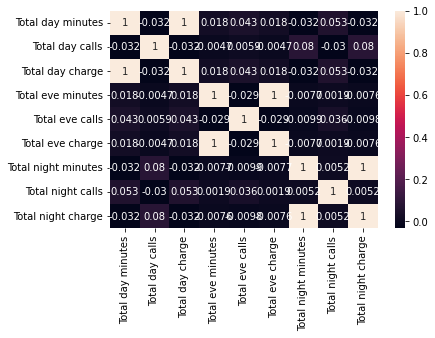

In [295]:
sns.heatmap(corr_matrix, annot=True)

In [296]:
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

table = pd.DataFrame(churn, columns = ['Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 
          'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge'
    ])

x = table[['Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 
          'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge']]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif_data)

               feature           VIF
0    Total day minutes  1.264563e+08
1      Total day calls  2.065238e+01
2     Total day charge  1.264599e+08
3    Total eve minutes  3.647296e+07
4      Total eve calls  2.291202e+01
5     Total eve charge  3.647284e+07
6  Total night minutes  1.043076e+07
7    Total night calls  2.095991e+01
8   Total night charge  1.042940e+07


In [440]:
day = pd.DataFrame(churn, columns = ['Total day minutes']).head(100).copy()
eve = pd.DataFrame(churn, columns = ['Total eve minutes']).head(100).copy()
night = pd.DataFrame(churn, columns = ['Total night minutes']).head(100).copy()

In [446]:
minut = pd.read_csv('дисперсионный анализ1.csv')
minut

,Unnamed: 0,duration,type
0,1,184.5,day
1,2,129.1,day
2,3,332.9,day
3,4,110.4,day
4,5,119.3,day
...,...,...,...
295,296,280.2,night
296,297,203.7,night
297,298,263.4,night
298,299,175.9,night


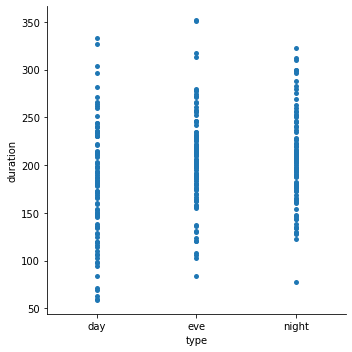

In [447]:
sns.catplot(x = "type", y = "duration", jitter = False, data = minut)

In [441]:
from scipy.stats import f_oneway

f_oneway(day, eve, night)

F_onewayResult(statistic=array([7.466632]), pvalue=array([0.00068576]))

In [442]:
minutes = pd.read_csv('дисперсионный анализ2.csv')
minutes

,Unnamed: 0,duration,type,voice_mail
0,1,146.3,day,Yes
1,2,193.7,day,Yes
2,3,179.3,day,Yes
3,4,281.4,day,Yes
4,5,148.6,day,Yes
...,...,...,...,...
151,152,299.0,night,No
152,153,227.3,night,No
153,154,178.6,night,No
154,155,154.0,night,No


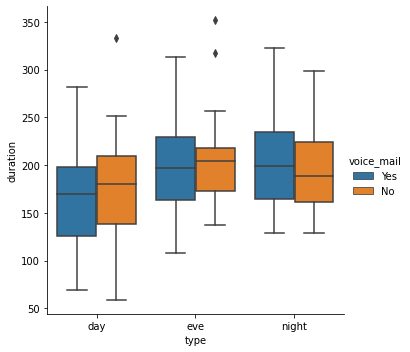

In [450]:
sns.catplot(kind = 'box', x = 'type', y = 'duration', hue = 'voice_mail', data = minutes)

In [443]:
from statsmodels.formula.api import ols

model = ols('duration ~ C(type) + C(voice_mail) + C(type):C(voice_mail)', data = minutes).fit()
sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(type),2.0,30000.083205,15000.041603,5.480409,0.005045
C(voice_mail),1.0,780.775641,780.775641,0.285264,0.594062
C(type):C(voice_mail),2.0,1894.711667,947.355833,0.346126,0.707987
Residual,150.0,410554.425385,2737.029503,NaN,NaN


In [532]:
from sklearn.linear_model import LinearRegression

In [554]:
x = np.asarray([184.5, 129.1, 332.9, 110.4, 119.3, 146.3, 211.3, 159.1, 186.1, 148.8, 193.7, 235.8, 214.1, 179.3, 203.4, 160.1, 251.8, 178.3, 135.0, 281.4, 148.6, 58.9, 239.8, 166.3, 146.7, 181.5, 102.8, 187.9, 183.6, 230.9, 182.1, 119.3, 116.8, 202.1, 271.6, 326.5, 243.8, 241.1, 136.1, 213.4, 196.6, 134.4, 83.6, 181.8, 154.0, 119.0, 165.9, 62.6, 168.3, 262.4, 94.4, 221.4, 189.8, 172.3, 198.4, 147.5, 303.9, 230.6, 172.7, 181.5, 266.6, 170.4, 296.4, 68.7, 233.8, 236.2, 244.6, 124.4, 230.0, 201.8, 214.0, 210.5, 105.6, 138.6, 234.4, 145.8, 97.2, 259.8, 239.9, 221.6])
y = np.asarray([31.37, 21.95, 56.59, 18.77, 20.28, 24.87, 35.92, 27.05, 31.64, 25.30, 32.93, 40.09, 36.40, 30.48, 34.58, 27.22, 42.81, 30.31, 22.95, 47.84, 25.26, 10.01, 40.77, 28.27, 24.94, 30.86, 17.48, 31.94, 31.21, 39.25, 30.96, 20.28, 19.86, 34.36, 46.17, 55.51, 41.45, 40.99, 23.14, 36.28, 33.42, 22.85, 14.21, 30.91, 26.18, 20.23, 28.20, 10.64, 28.61, 44.61, 16.05, 37.64, 32.27, 29.29, 33.73, 25.08, 51.66, 39.20, 29.36, 30.86, 45.32, 28.97, 50.39, 11.68, 39.75, 40.15, 41.58, 21.15, 39.10, 34.31, 36.38, 35.79, 17.95, 23.56, 39.85, 24.79, 16.52, 44.17, 40.78, 37.67])

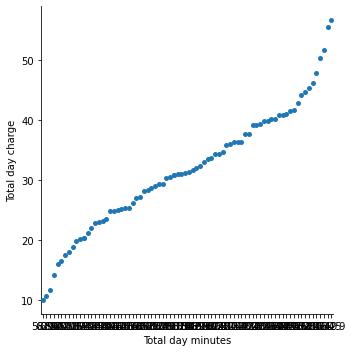

In [538]:
intermediate_dictionary = {'Total day minutes':x, 'Total day charge':y}
data = pd.DataFrame(intermediate_dictionary)
sns.catplot(x = "Total day minutes", y = "Total day charge", jitter = False, data = data)

In [540]:
n = len(x)
lin_model = sps.linregress(x, y)
a,b = lin_model.slope, lin_model.intercept
# оценка ср.кв. ошибки для a и b
a_err, b_err = lin_model.stderr, lin_model.intercept_stderr
# Доверительный интервал для alpha=5%
a_conf = sps.t.interval(0.95, df = n-2, loc = a, scale = a_err)
b_conf = sps.t.interval(0.95, df = n-2, loc = b, scale = b_err)

print(f"a = {a:0.4f}, α=5% [{a_conf[0]:0.4f} - {a_conf[1]:0.4f}]")
print(f"b = {b:0.4f}, α=5% [{b_conf[0]:0.4f} - {b_conf[1]:0.4f}]")

a = 0.1700, α=5% [0.1700 - 0.1700]
b = 0.0004, α=5% [-0.0016 - 0.0023]


In [561]:
x = [184.5, 129.1, 332.9, 110.4, 119.3, 146.3, 211.3, 159.1, 186.1, 148.8, 193.7, 235.8, 214.1, 179.3, 203.4, 160.1, 251.8, 178.3, 135.0, 281.4, 148.6, 58.9, 239.8, 166.3, 146.7, 181.5, 102.8, 187.9, 183.6, 230.9, 182.1, 119.3, 116.8, 202.1, 271.6, 326.5, 243.8, 241.1, 136.1, 213.4, 196.6, 134.4, 83.6, 181.8, 154.0, 119.0, 165.9, 62.6, 168.3, 262.4, 94.4, 221.4, 189.8, 172.3, 198.4, 147.5, 303.9, 230.6, 172.7, 181.5, 266.6, 170.4, 296.4, 68.7, 233.8, 236.2, 244.6, 124.4, 230.0, 201.8, 214.0, 210.5, 105.6, 138.6, 234.4, 145.8, 97.2, 259.8, 239.9, 221.6]
y = [31.37, 21.95, 56.59, 18.77, 20.28, 24.87, 35.92, 27.05, 31.64, 25.30, 32.93, 40.09, 36.40, 30.48, 34.58, 27.22, 42.81, 30.31, 22.95, 47.84, 25.26, 10.01, 40.77, 28.27, 24.94, 30.86, 17.48, 31.94, 31.21, 39.25, 30.96, 20.28, 19.86, 34.36, 46.17, 55.51, 41.45, 40.99, 23.14, 36.28, 33.42, 22.85, 14.21, 30.91, 26.18, 20.23, 28.20, 10.64, 28.61, 44.61, 16.05, 37.64, 32.27, 29.29, 33.73, 25.08, 51.66, 39.20, 29.36, 30.86, 45.32, 28.97, 50.39, 11.68, 39.75, 40.15, 41.58, 21.15, 39.10, 34.31, 36.38, 35.79, 17.95, 23.56, 39.85, 24.79, 16.52, 44.17, 40.78, 37.67]

X = np.transpose(x) # transpose so input vectors
X = np.c_[X, np.ones(X.shape[0])]  # add bias term
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[0.17000325 0.00035957]


In [583]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = churn[['Total day minutes']].values
y = churn['Total day charge'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

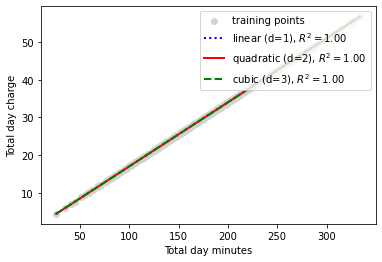

In [584]:
# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('Total day minutes')
plt.ylabel('Total day charge')
plt.legend(loc='upper right')

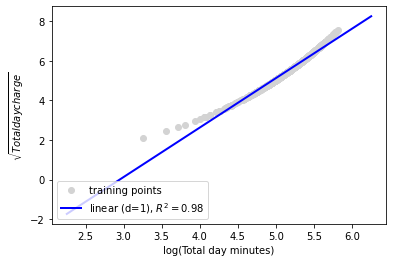

In [585]:
X = churn[['Total day minutes']].values
y = churn['Total day charge'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2)

plt.xlabel('log(Total day minutes)')
plt.ylabel('$\sqrt{Total day charge}$')
plt.legend(loc='lower left')